In [33]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


nltk.download('stopwords')


data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')


corpus = []
for i in range(len(data)):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)


X = corpus
y = data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


tfidf_vectorizer = TfidfVectorizer(max_features=1500)
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test = tfidf_vectorizer.transform(X_test).toarray()


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


param_grid_lr = {
    'C': [0.1, 1, 10]
}

rf_classifier = RandomForestClassifier(random_state=0)


grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)


best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)


lr_classifier = LogisticRegression(random_state=0)


grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)


best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)


best_rf_classifier = grid_search_rf.best_estimator_
best_lr_classifier = grid_search_lr.best_estimator_

y_pred_rf = best_rf_classifier.predict(X_test)
y_pred_lr = best_lr_classifier.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy for Random Forest: {accuracy_rf:.2f}')


report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", report_rf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy for Logistic Regression: {accuracy_lr:.2f}')

report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression:\n", report_lr)


[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Hyperparameters for Logistic Regression: {'C': 1}
Accuracy for Random Forest: 0.73
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77        97
           1       0.87      0.57      0.69       103

    accuracy                           0.73       200
   macro avg       0.77      0.74      0.73       200
weighted avg       0.77      0.73      0.73       200

Accuracy for Logistic Regression: 0.75
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        97
           1       0.83      0.65      0.73       103

    accuracy                           0.75       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200



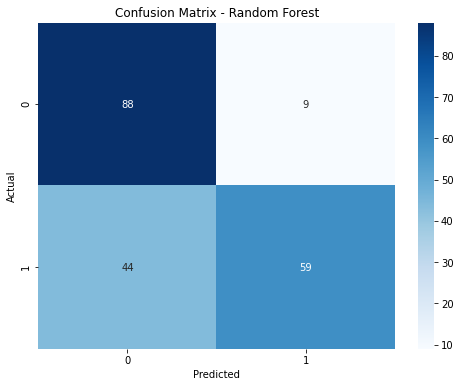

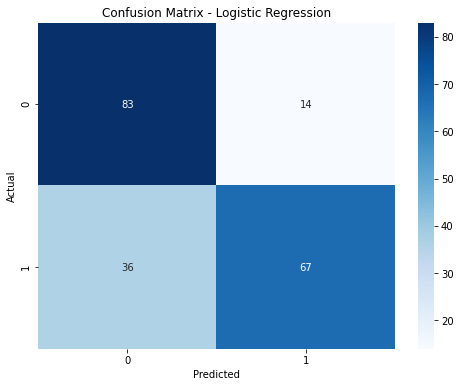

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [34]:
 
def predict_sentiment(review, tfidf_vectorizer, best_rf_classifier, best_lr_classifier):
    
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=review)
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
  
    review_vectorized = tfidf_vectorizer.transform([review]).toarray()
    
    rf_prediction = best_rf_classifier.predict(review_vectorized)
    
    lr_prediction = best_lr_classifier.predict(review_vectorized)
    
    sentiment = "Positive" if (rf_prediction[0] == 1 and lr_prediction[0] == 1) else "Negative"
    
    return sentiment


input_review = "I loved the food at this restaurant, it was amazing!"
predicted_sentiment = predict_sentiment(input_review, tfidf_vectorizer, best_rf_classifier, best_lr_classifier)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: Positive
